# Goal: L5 EDA

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [3]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-05\data2\lev_05_mp_clean.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('OutOfHome_Consumption_Quantity', Int32),
        ('OutOfHome_Consumption_Value', Int32),
        ('Total_Consumption_Quantity', Int32),
        ('Total_Consumption_Value', Int32),
        ('Source', Int32)])

In [4]:
def draw_pie(col: str) -> None:
    df = pdf[col].value_counts().to_pandas()
    display(df)

    plt.pie(
        df['count'],
        labels=df[col],
        autopct='%1.2f%%'
    )
    plt.title(f"{col} Percentage")
    plt.show()
    print({'=='*45})

In [17]:
hc_qty = pdf['OutOfHome_Consumption_Quantity'].value_counts() \
    .to_pandas() \
    .sort_values(by='count', ascending=False) \

hc_qty

,OutOfHome_Consumption_Quantity,count
45,1.0,193704
9,0.0,150602
98,7.0,145586
34,10.0,87912
108,2.0,86260
...,...,...
51,118.0,2
25,87.0,2
95,81.0,2
97,109.0,2


In [42]:
def plot_bar(col):
    plot_df = pdf[col].value_counts() \
        .to_pandas() \
        .sort_values(by='count', ascending=False)

    plt.figure(figsize=(15, 6))
    sns.barplot(
        data=plot_df.head(30),
        x=col,
        y='count', 
        order=plot_df.head(30)[col]
    )
    plt.title(f"{col} Counts")
    plt.show()

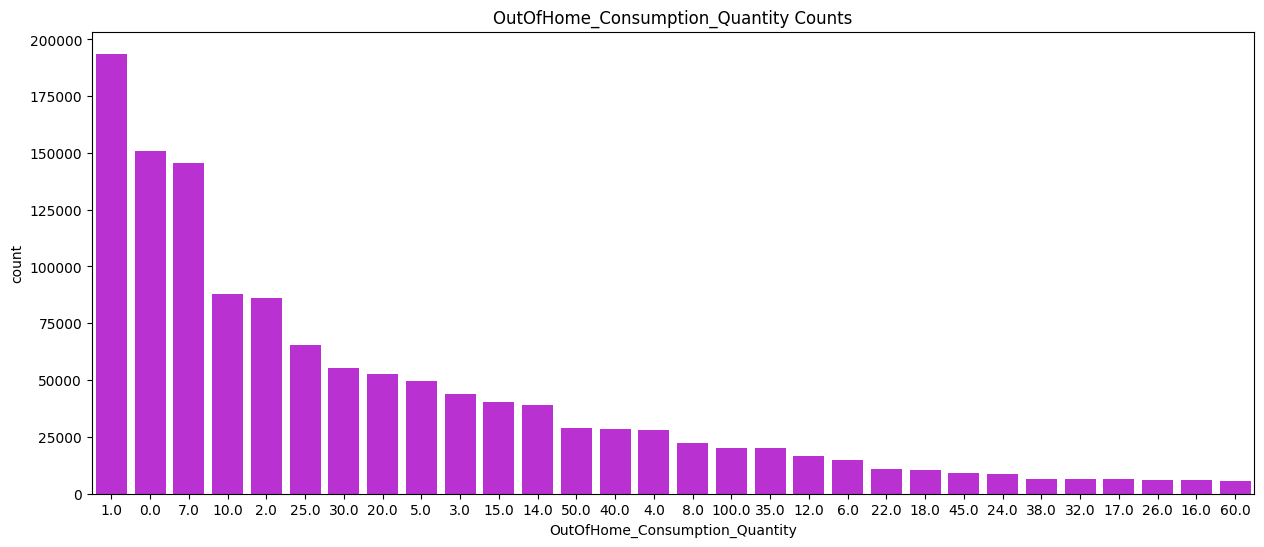

In [43]:
plot_bar('OutOfHome_Consumption_Quantity')

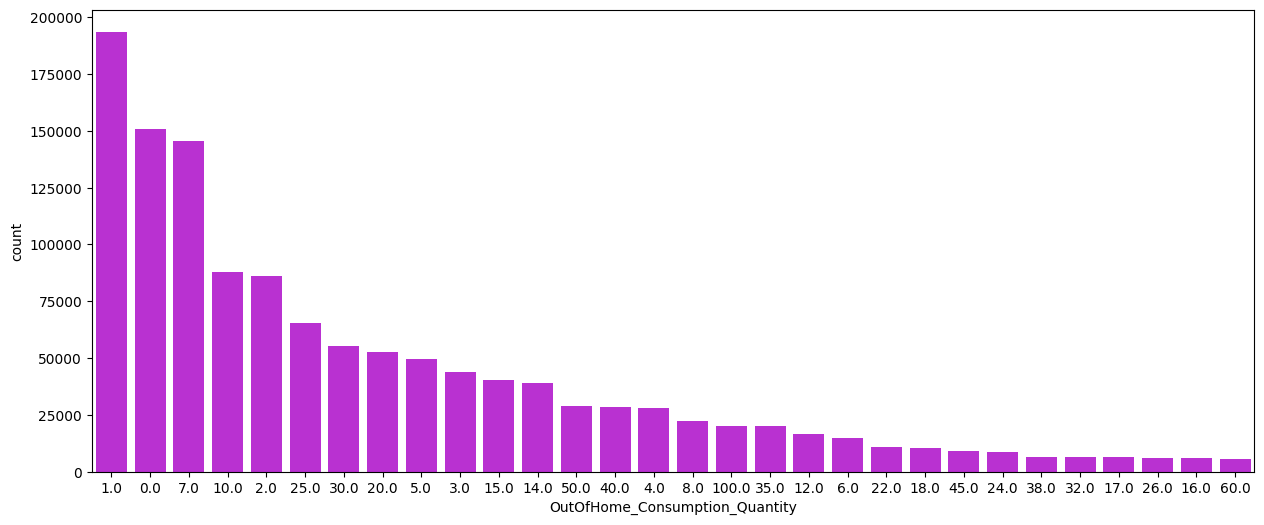

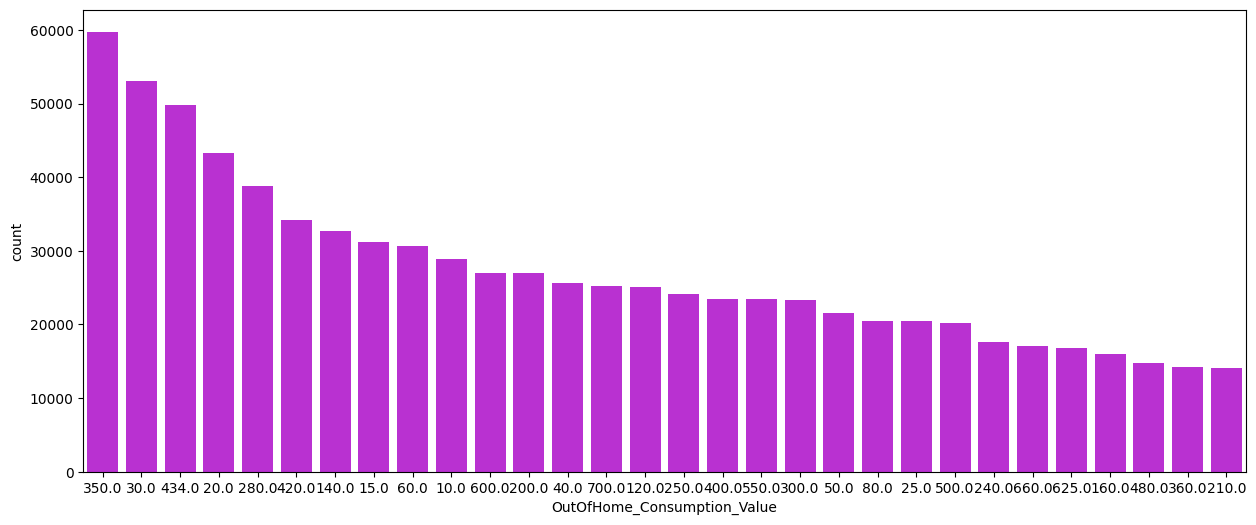

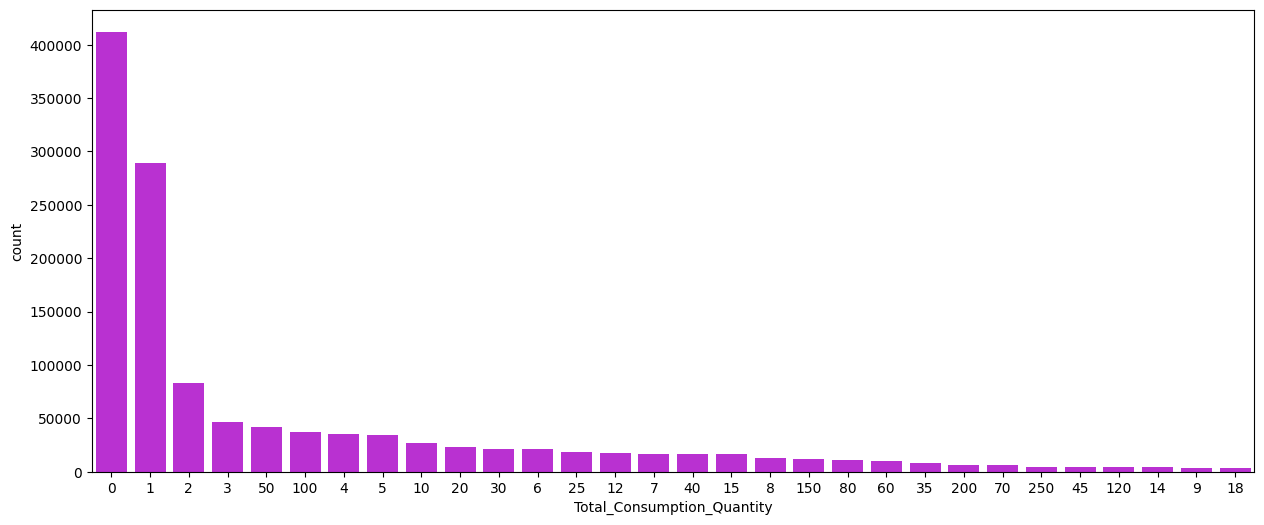

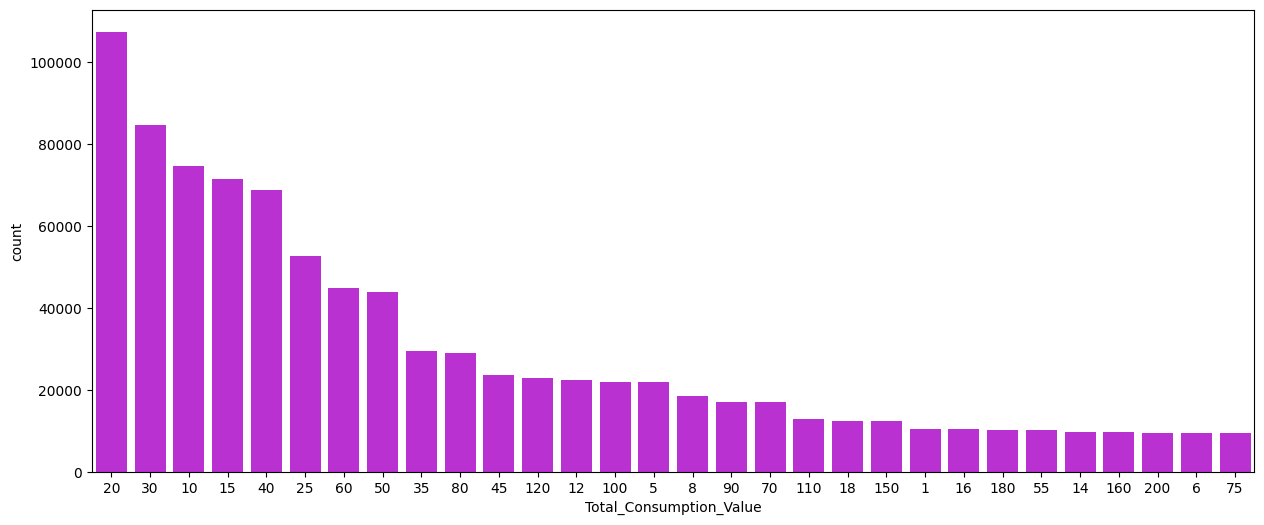

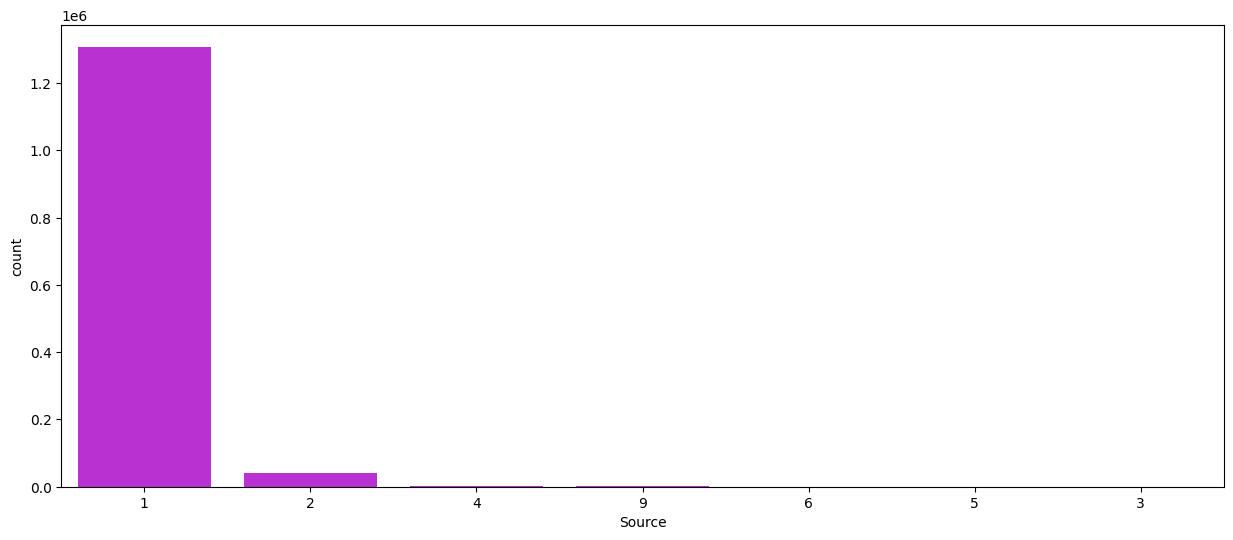

In [41]:
cols = pdf.columns

for col in cols:
    plot_bar(col)

,OutOfHome_Consumption_Quantity,count
0,11.0,4488
1,83.0,30
2,5.0,49752
3,78.0,110
4,650.0,4
...,...,...
145,80.0,5190
146,400.0,164
147,73.0,22
148,1.0,193704


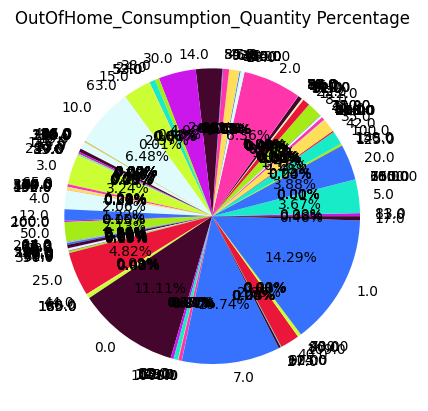

{'=========================================================================================='}


,OutOfHome_Consumption_Value,count
0,1162.0,2
1,1395.0,24
2,995.0,2
3,680.0,980
4,13.0,1198
...,...,...
1006,1106.0,2
1007,474.0,188
1008,957.0,6
1009,156.0,652


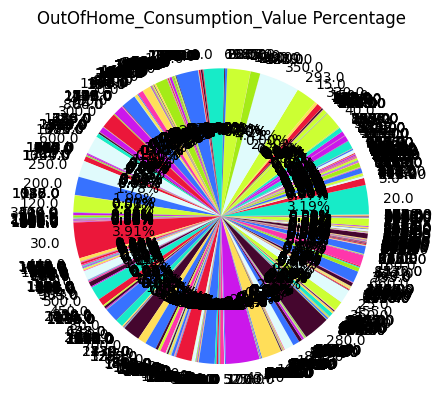

{'=========================================================================================='}


,Total_Consumption_Quantity,count
0,507,32
1,84,62
2,607,28
3,732,12
4,729,4
...,...,...
970,581,12
971,313,48
972,830,108
973,373,44


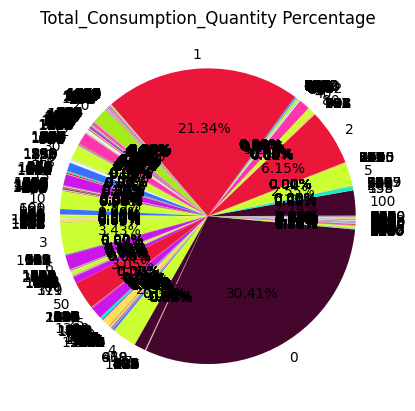

{'=========================================================================================='}


,Total_Consumption_Value,count
0,2010,10
1,2377,4
2,332,150
3,394,56
4,534,54
...,...,...
2104,1332,2
2105,345,764
2106,300,6050
2107,1627,6


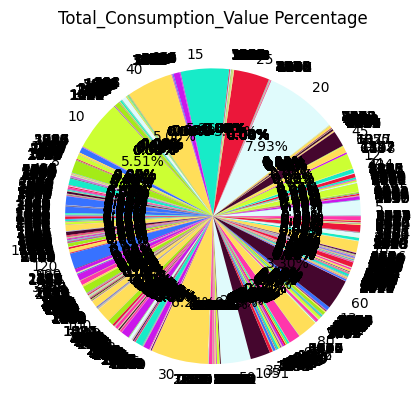

{'=========================================================================================='}


,Source,count
0,4,2718
1,1,1308038
2,3,576
3,9,1938
4,5,624
5,2,41120
6,6,650


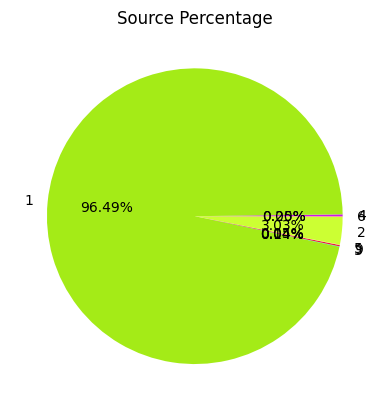

{'=========================================================================================='}


In [5]:
for col in pdf.columns:
    draw_pie(col)

# Descriptive Summary

## What is the average Out-of-Home consumption quantity and value across all sources?

In [6]:
pdf.describe()

statistic,OutOfHome_Consumption_Quantity,OutOfHome_Consumption_Value,Total_Consumption_Quantity,Total_Consumption_Value,Source
str,f64,f64,f64,f64,f64
"""count""",1.355659e6,1.355659e6,1.355664e6,1.355664e6,1.355664e6
"""null_count""",5.0,5.0,0.0,0.0,0.0
"""mean""",17.39,327.58508,34.02929,115.586601,1.052872
"""std""",38.279044,318.829722,105.716854,207.995677,0.397648
"""min""",0.0,0.0,0.0,1.0,1.0
"""25%""",1.0,60.0,0.0,20.0,1.0
"""50%""",7.0,280.0,1.0,40.0,1.0
"""75%""",22.0,470.0,15.0,120.0,1.0
"""max""",1250.0,3804.0,15250.0,18550.0,9.0


## **Which source contributes the highest total consumption value?**

In [7]:
pdf['Source'].value_counts()

Source,count
i32,u32
2,41120
1,1308038
3,576
4,2718
6,650
5,624
9,1938


- This is the energy source may be from at the above level or level 3 lighting source level 

## What is the distribution of Total Consumption Quantity across different sources?

In [8]:
pdf.group_by('Source').agg(
    pl.sum('Total_Consumption_Quantity')
    )

Source,Total_Consumption_Quantity
i32,i32
6,11294
9,7720
3,27192
1,45543680
4,15968
2,519594
5,6836


In [9]:
pdf.group_by('Source').agg(
    pl.sum('OutOfHome_Consumption_Value')
    )

Source,OutOfHome_Consumption_Value
i32,i32
6,145244
9,723252
3,124948
1,431345344
4,587926
2,11032248
5,134700


# Comparative / Relationship Questions

## There a strong correlation 

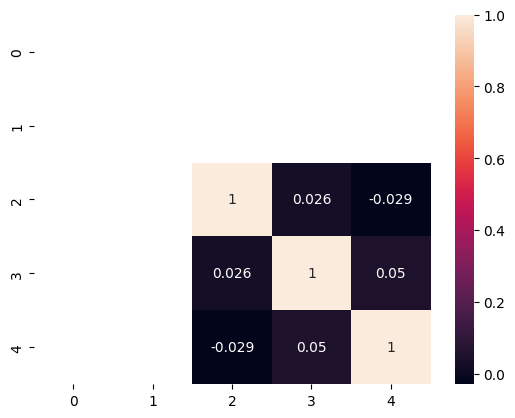

In [10]:
sns.heatmap(
    data=pdf.corr(),
    annot=True
)
plt.show('Correction')
plt.show()

In [ ]:
pdf.columns

['OutOfHome_Consumption_Quantity',
 'OutOfHome_Consumption_Value',
 'Total_Consumption_Quantity',
 'Total_Consumption_Value',
 'Source']